# Multiple Regression 50 Startups Data Set

In [56]:
# Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [57]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [58]:
ct = ColumnTransformer(transformers=[('encoder'
                                      , OneHotEncoder()
                                      , [3])]
                       , remainder='passthrough')

X = np.array(ct.fit_transform(X))

labelencoder = LabelEncoder()

dataset['State'] = labelencoder.fit_transform(dataset['State'])
dataset = pd.get_dummies(dataset)

dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


<Axes: >

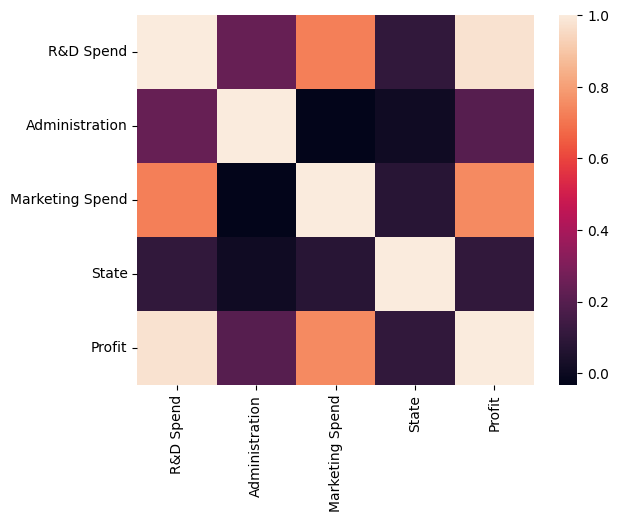

In [59]:
sns.heatmap(dataset.corr())

In [60]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X
                                                   , y
                                                   , test_size = 0.2
                                                   , random_state = 0)

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Coefficients: \n', regressor.coef_)
print('\n Intercept: \n', regressor.intercept_)

Coefficients: 
 [-9.59e+02  6.99e+02  7.73e-01  3.29e-02  3.66e-02]

 Intercept: 
 42554.16761776614


In [62]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1)
                     , y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [63]:
# print the R-squared value for the training data
r_squared_train = regressor.score(X_train, y_train)
print('R-squared value for the training set: ', r_squared_train)

# print the R-squared value for the test data
r_squared_test = regressor.score(X_test, y_test)
print('R-squared value for the training set: ', r_squared_test)

R-squared value for the training set:  0.9501847627493607
R-squared value for the training set:  0.9347068473282966


In [64]:
coefficients = regressor.coef_
intercept = regressor.intercept_

equation = 'y = '
for i in range(len(coefficients)):
    equation += f"{coefficients[i]:.2f}*x{i} + "
equation += f"{intercept:.2f}"

print(equation)

y = -959.28*x0 + 699.37*x1 + 0.77*x2 + 0.03*x3 + 0.04*x4 + 42554.17


# Multiple Regression 1000 Companies Data Set

In [65]:
dataset = pd.read_csv('1000_Companies.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [66]:
ct = ColumnTransformer(transformers=[('encoder'
                                      , OneHotEncoder()
                                      , [3])]
                       , remainder='passthrough')

X = np.array(ct.fit_transform(X))

labelencoder = LabelEncoder()

dataset['State'] = labelencoder.fit_transform(dataset['State'])
dataset = pd.get_dummies(dataset)

dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


<Axes: >

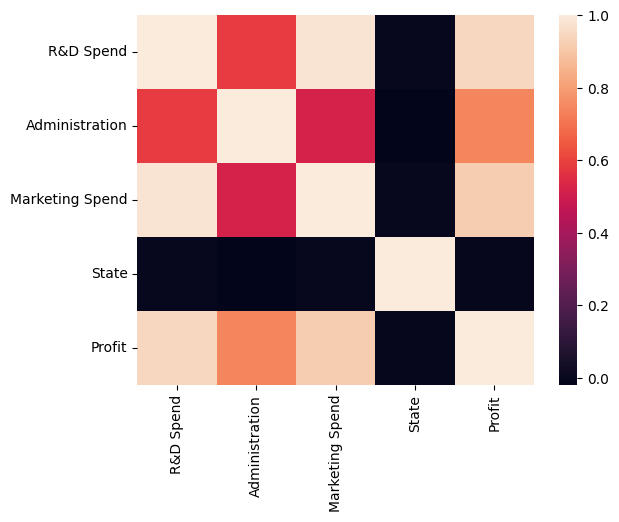

In [67]:
sns.heatmap(dataset.corr())

In [68]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X
                                                   , y
                                                   , test_size = 0.2
                                                   , random_state = 0)

In [69]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Coefficients: \n', regressor.coef_)
print('\n Intercept: \n', regressor.intercept_)

Coefficients: 
 [-8.81e+02 -6.98e+02  5.26e-01  8.44e-01  1.08e-01]

 Intercept: 
 -51035.22972403464


In [70]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1)
                     , y_test.reshape(len(y_test),1)),1))

[[ 89790.62  89012.03]
 [ 88427.07  87654.56]
 [ 94894.68  94093.35]
 [175680.87 175396.26]
 [ 83411.73  83356.62]
 [110571.9  110395.79]
 [132145.23 105008.31]
 [ 91473.38  90687.29]
 [164597.05 164180.27]
 [ 53222.83  53483.76]
 [ 66950.19  66273.35]
 [150566.44 150393.72]
 [126915.21 125971.23]
 [ 59337.86  58694.93]
 [177513.91 176344.52]
 [ 75316.28  75297.23]
 [118248.14 118219.39]
 [164574.41 163462.67]
 [170937.29 132602.65]
 [182069.12 181574.5 ]
 [118845.03  97483.56]
 [ 85669.95  84909.72]
 [180992.59 180684.33]
 [ 84145.08  83391.64]
 [105005.84 104159.47]
 [101233.57 100404.  ]
 [ 53831.08  64926.08]
 [ 56881.41  56944.49]
 [ 68896.39  68210.89]
 [210040.01 191792.06]
 [120778.72 120738.7 ]
 [111724.87 110848.57]
 [101487.91 101352.27]
 [137959.03 137842.47]
 [ 63969.96  63306.4 ]
 [108857.91 107994.38]
 [186014.73 185502.53]
 [171442.64 171176.92]
 [174644.27 174364.28]
 [117671.49 117645.31]
 [ 96731.38  96616.93]
 [165452.26 164336.61]
 [107724.34 106865.86]
 [ 50194.54

In [71]:
# print the R-squared value for the training data
r_squared_train = regressor.score(X_train, y_train)
print('R-squared value for the training set: ', r_squared_train)

# print the R-squared value for the test data
r_squared_test = regressor.score(X_test, y_test)
print('R-squared value for the training set: ', r_squared_test)

R-squared value for the training set:  0.9585497032796175
R-squared value for the training set:  0.9112695892268834


In [72]:
coefficients = regressor.coef_
intercept = regressor.intercept_

equation = 'y = '
for i in range(len(coefficients)):
    equation += f"{coefficients[i]:.2f}*x{i} + "
equation += f"{intercept:.2f}"

print(equation)

y = -880.54*x0 + -698.17*x1 + 0.53*x2 + 0.84*x3 + 0.11*x4 + -51035.23


**What does the model equation look like? Compare it with the model obtained in part 1.**
The model equations for both data sets are similar, but the coefficients and error terms are different, as they are estimated using different data sets.

**Determine the fitting of the model**
By examining the R-squared values which is both 90% above, you can determine the fitting of the multiple regression model which is fitting for the two datasets.

**Does the number of sample data affect the success of the model? How so?**
Yes, the number of sample data affects the success of the model. Higher number of sample data seems to give much more reliable coefficients. Here are what impacts the each model's performance, looking at the precision of each model, as the number of sample data increases the model tends to have better precision and accuracy. Larger sample size helps improve the model's ability to generalize well to unseen data and reduces the likelihood of overfitting.